learning from [previous nb](2023-03-10_simdata_MNE_notes.ipynb)

Requirements:
- Easily adjust duration, num channels
- sampling rate should either be adjustable or on the higher end of what's typically used
- ideally there should be groups (EEG, MEG, misc bio sensors)

In [109]:
import numpy as np
import mne

def simulate_eeg(duration=10, n_channels=100, sfreq=1000):
    """
    Simulate EEG data using the MNE toolbox as noisy sine waves.
    For now, hard-coding the noise amplitude scaling and eeg data scaling.

    Parameters:
        duration (float): Duration of the simulated data in seconds.
        n_channels (int): Number of EEG channels.
        sfreq (float): Sampling frequency in Hz.

    Returns:
        mne.io.RawArray: Simulated EEG data as a `mne.io.RawArray` object.

    """

    # Calculate the number of samples based on duration and sampling frequency
    n_samples = int(duration * sfreq)

    # Create a time vector for the EEG data
    times = np.arange(n_samples) / sfreq

    # Generate synthetic EEG data using sine waves
    data = np.zeros((n_channels, n_samples))
    for ch in range(n_channels):
        # Generate a random frequency for each channel
        freq = np.random.uniform(4, 30)
        # Generate a sine wave for the channel
        sine_wave = np.sin(2 * np.pi * freq * times)
        # Add the sine wave to the channel's data
        data[ch] = sine_wave

    # Add noise to the data to make it more realistic
    noise_amplitude = 0.2  # Adjust this parameter to control the noise level
    noise = np.random.normal(scale=noise_amplitude, size=(n_channels, n_samples))
    data += noise
    
    # There is some correction happening for 'eeg' 'ch_type' data that scales it up..
    # so scale the data down first:
    data = data * 1e-5

    # Create a channel names list
    ch_names = [f'EEG {i+1}' for i in range(n_channels)]

    # Create an info object
    info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')

    # Create a `mne.io.RawArray` object
    raw = mne.io.RawArray(data, info)

    return raw


In [110]:
simeeg = simulate_eeg()

Creating RawArray with float64 data, n_channels=100, n_times=10000
    Range : 0 ... 9999 =      0.000 ...     9.999 secs
Ready.


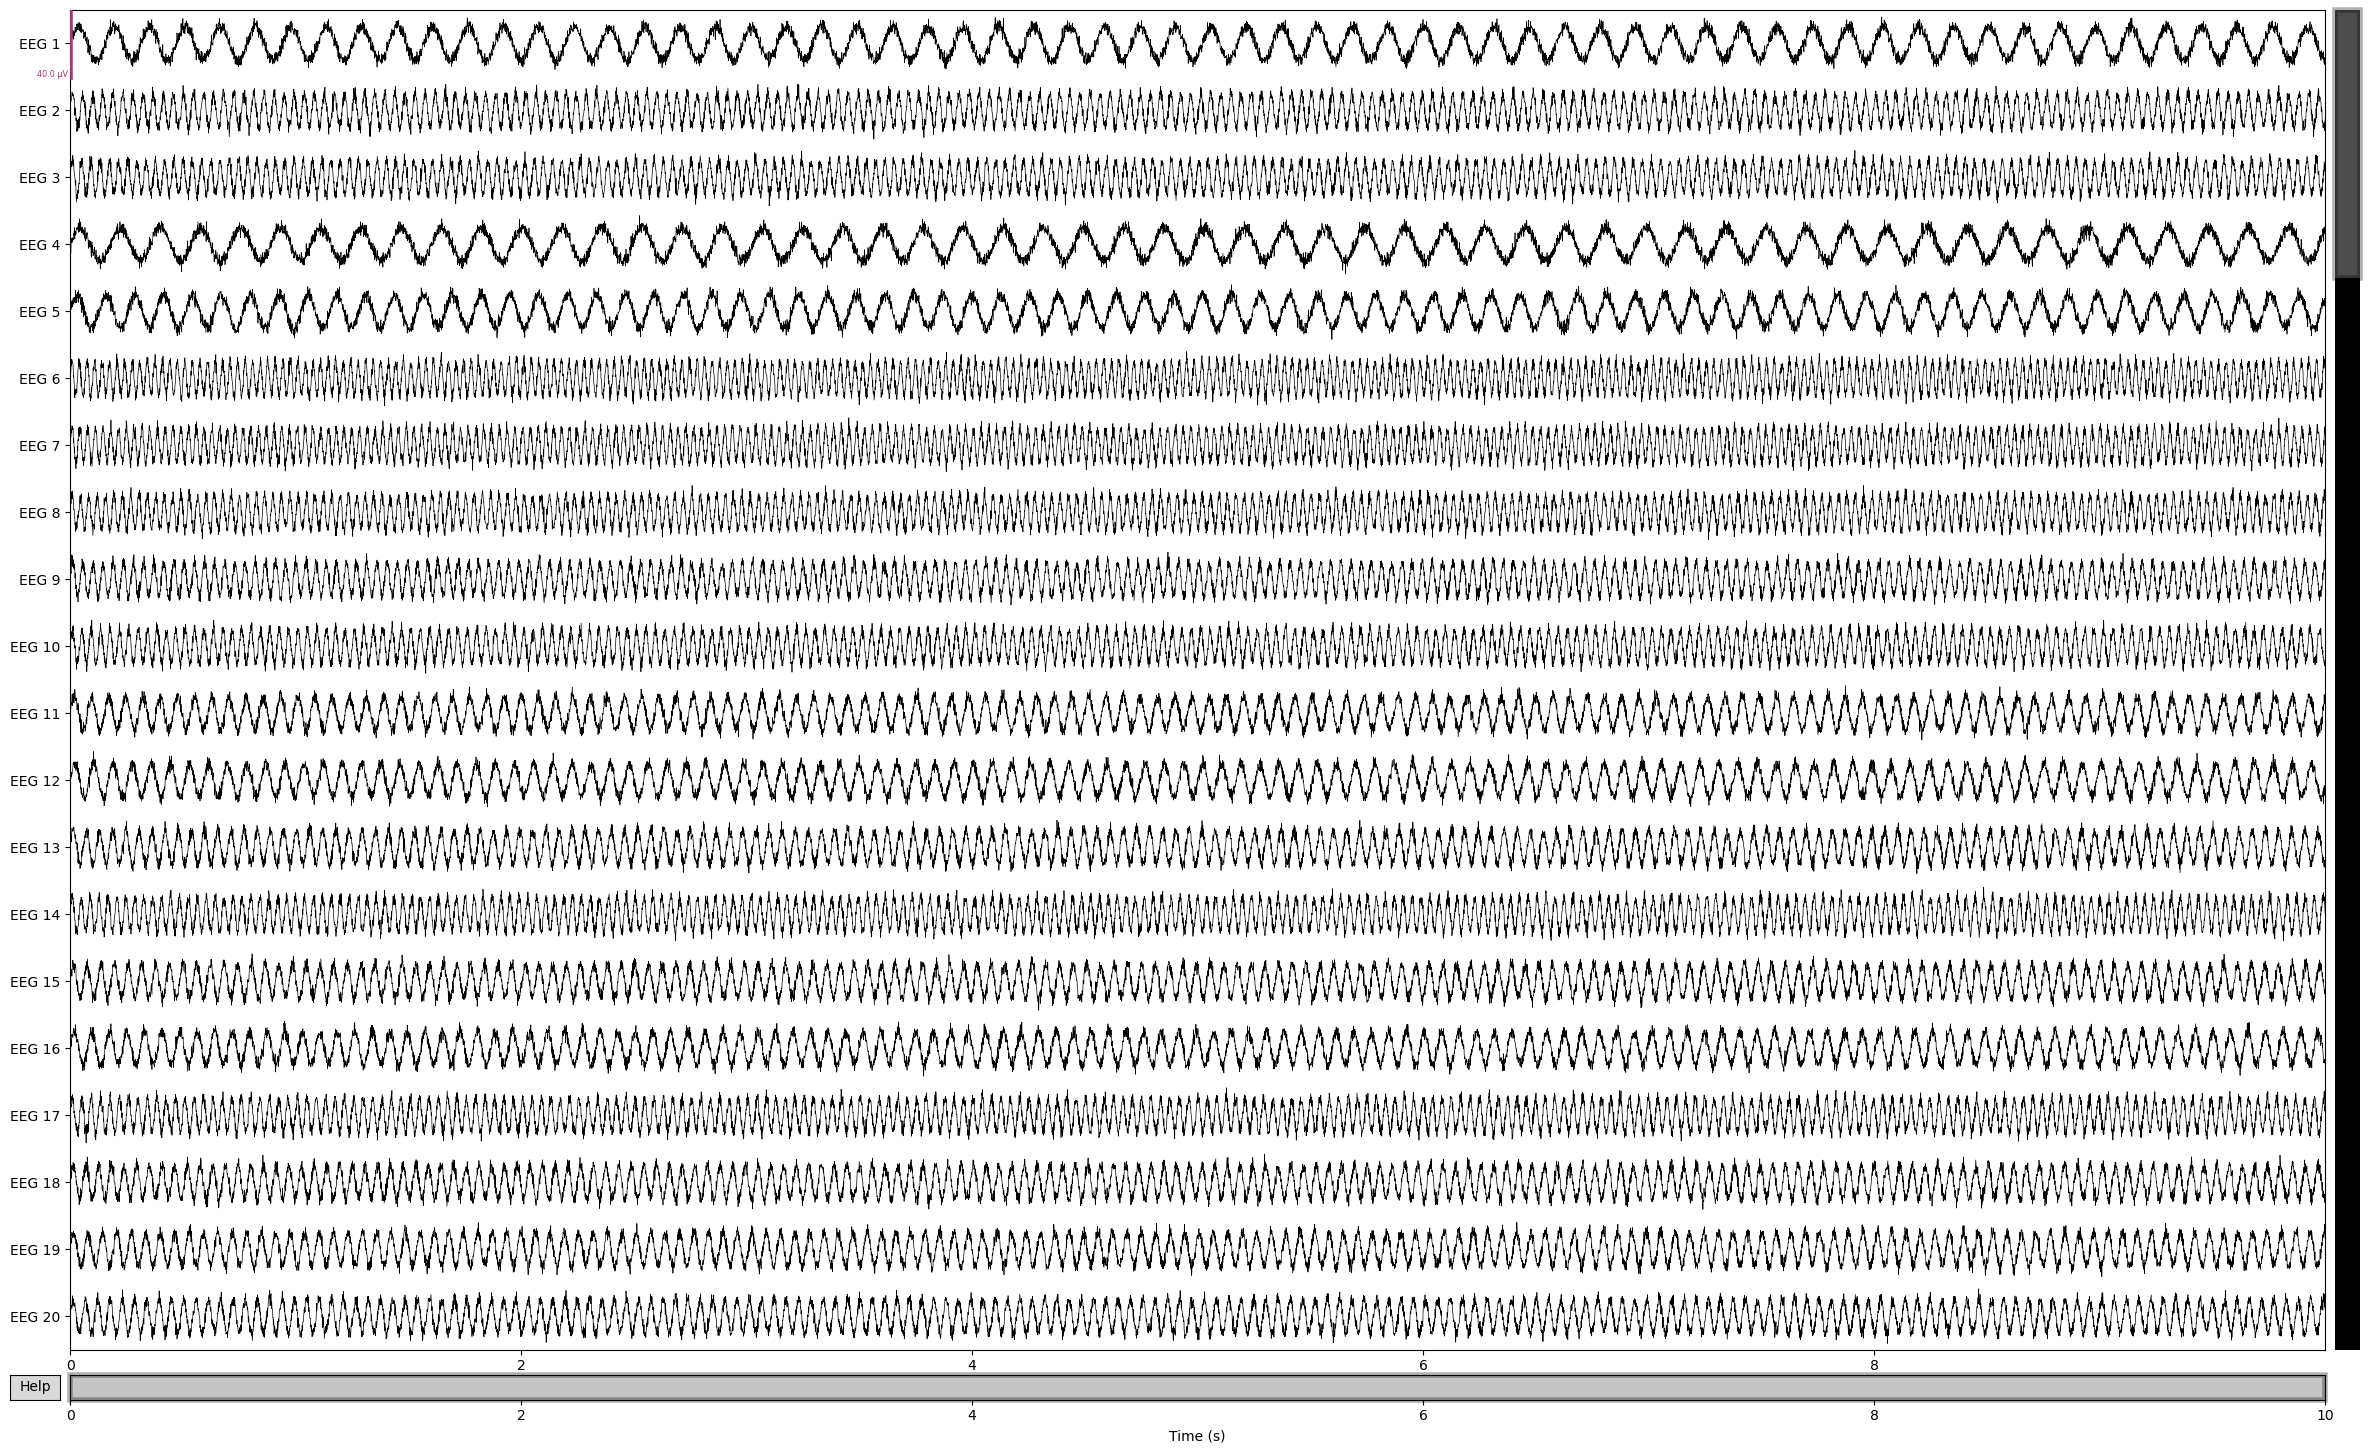

In [121]:
mne.viz.set_browser_backend('matplotlib')
simeeg.plot();

## from script

In [8]:
import sys; sys.path.insert(0, '../..')
from scripts.simdata import simulate_eeg
import mne

In [9]:
eeg = simulate_eeg()

Creating RawArray with float64 data, n_channels=100, n_times=10000
    Range : 0 ... 9999 =      0.000 ...     9.999 secs
Ready.


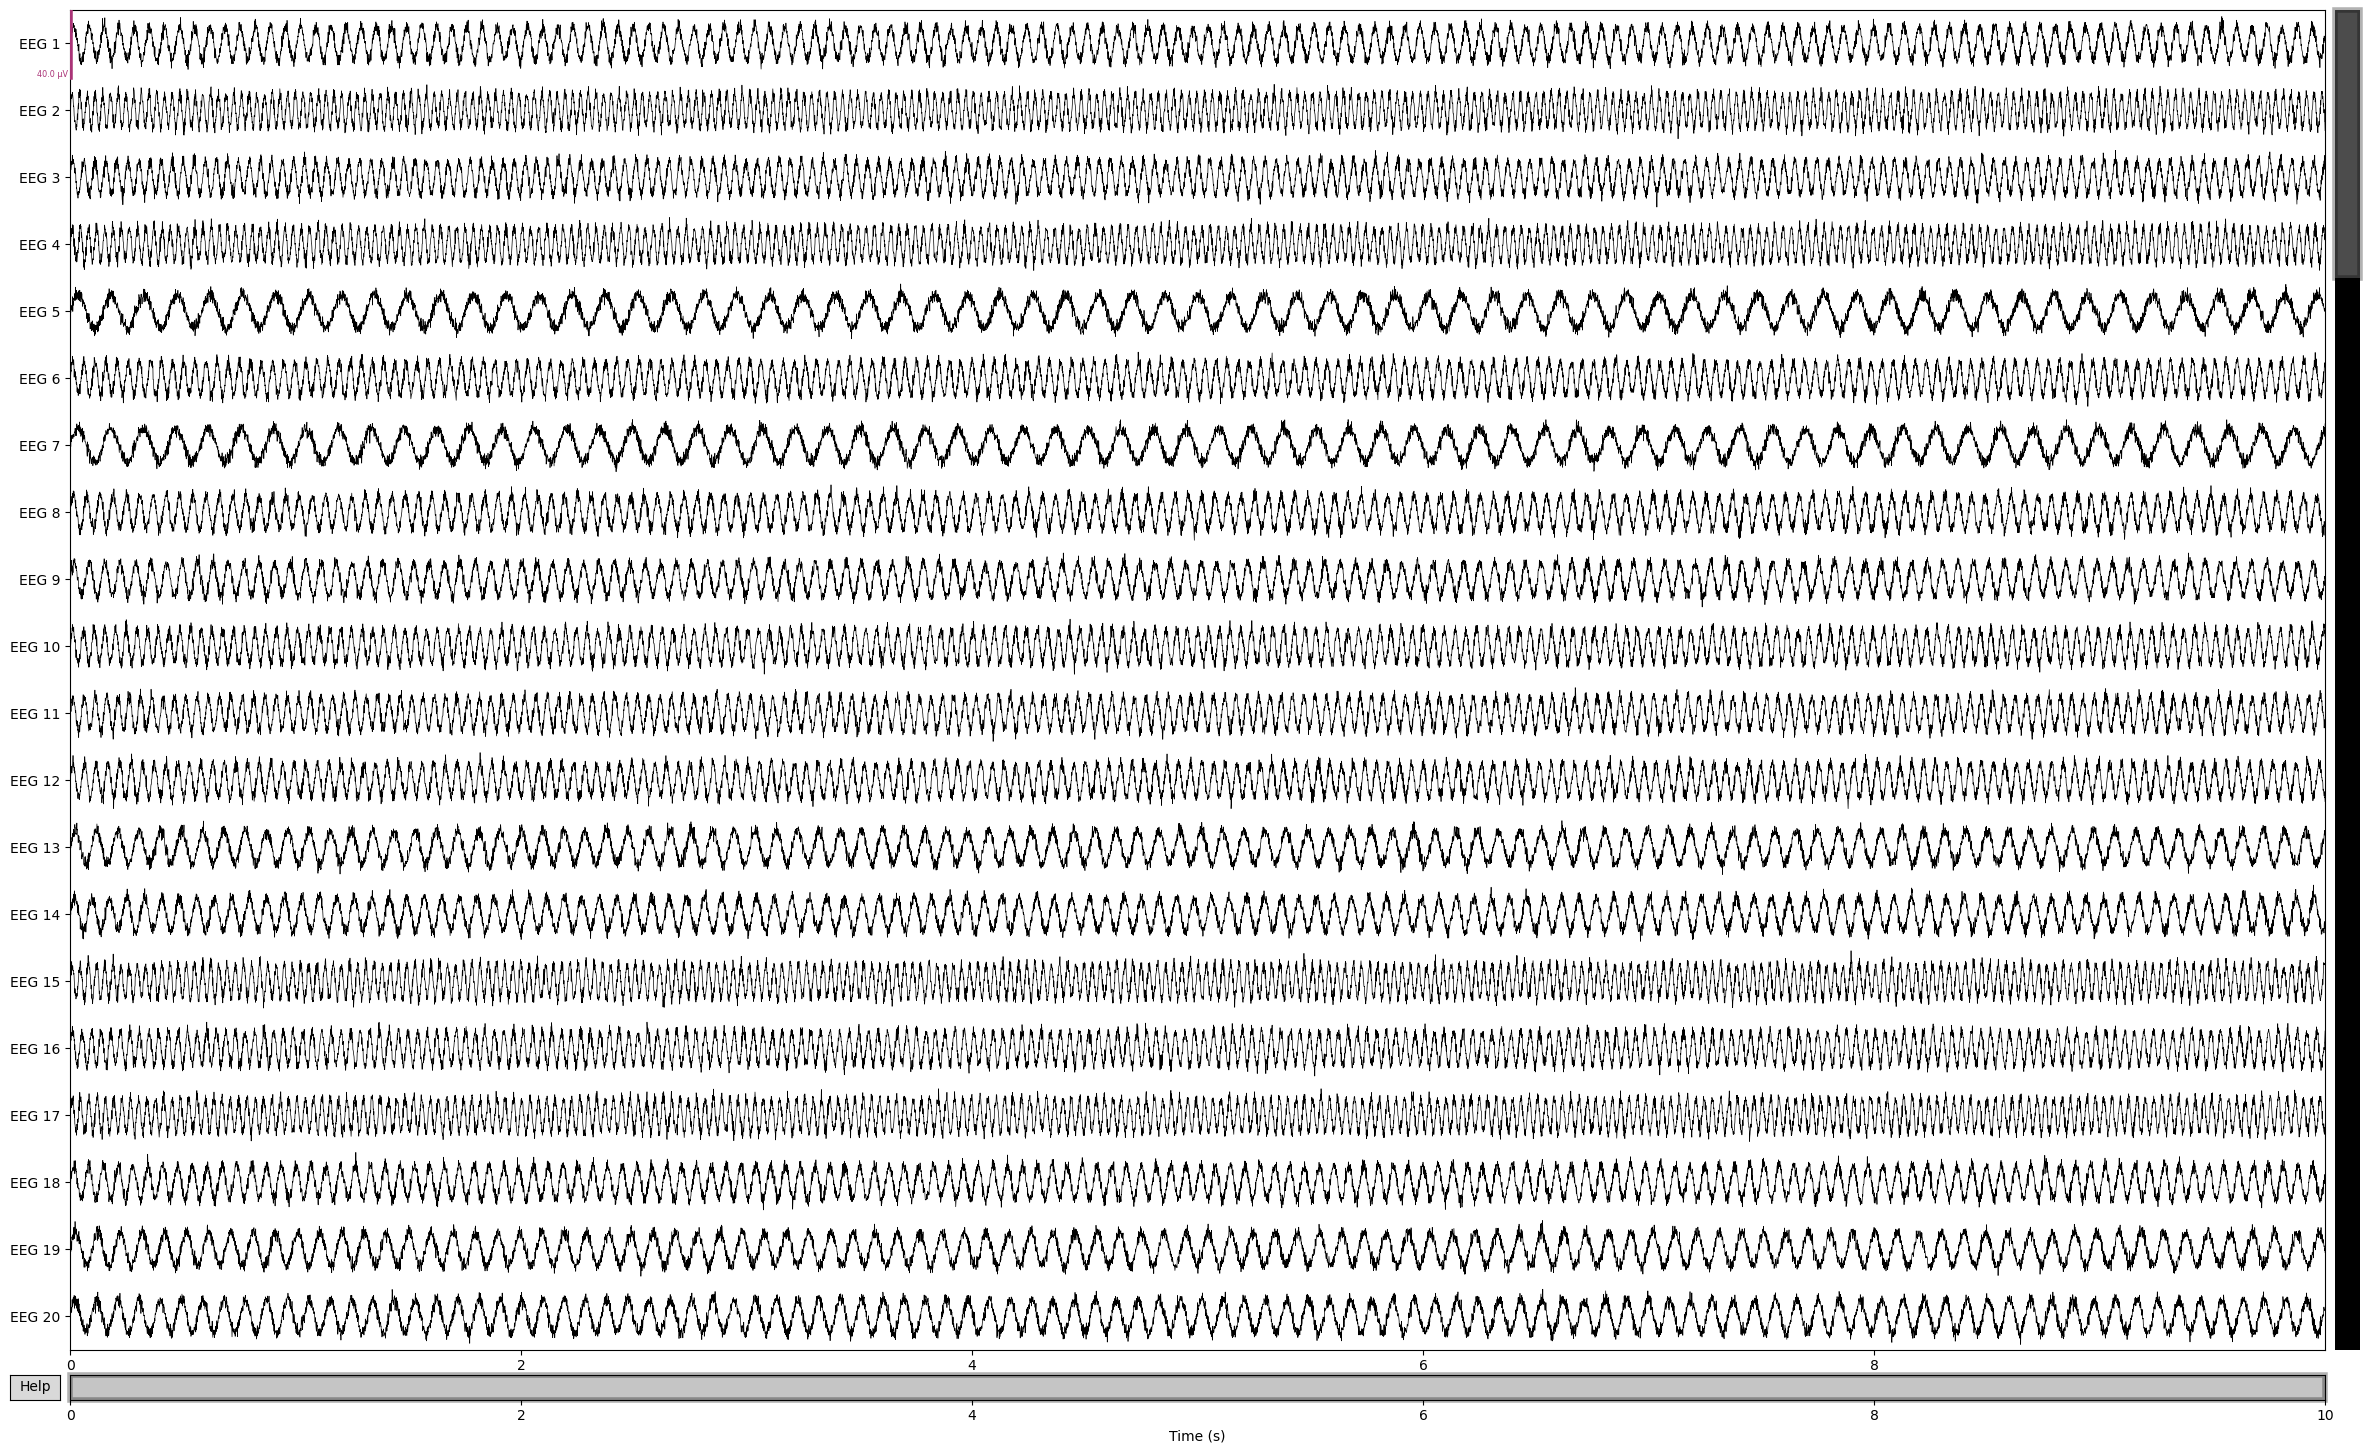

In [5]:
mne.viz.set_browser_backend('matplotlib')
eeg.plot();